In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
#from sklearn.feature_selection import RFE

In [2]:
#Reading the Csv file
bike_sharing_df = pd.read_csv('BikeSharingData.csv',low_memory=False)

In [3]:
bike_sharing_df.shape

(10886, 12)

In [4]:
bike_sharing_df['weather_types']=bike_sharing_df['weather'].map({1:'cloudy',2:'rainy',3:'sunny',4:'windy'})

In [5]:
bike_sharing_df['Season_Names']=bike_sharing_df['season'].map({1:'autumn',2:'spring',3:'summer',4:'winter'})

In [6]:
bike_sharing_df['day'] = pd.to_datetime(bike_sharing_df['datetime']).dt.day
bike_sharing_df['month'] = pd.to_datetime(bike_sharing_df['datetime']).dt.month
bike_sharing_df['year'] = pd.to_datetime(bike_sharing_df['datetime']).dt.year
bike_sharing_df['hour'] = pd.to_datetime(bike_sharing_df['datetime']).dt.hour

#bike_sharing_df.drop('datetime', axis=1, inplace=True)

In [7]:
bike_sharing_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weather_types,Season_Names,day,month,year,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,cloudy,autumn,1,1,2011,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,cloudy,autumn,1,1,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,cloudy,autumn,1,1,2011,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,cloudy,autumn,1,1,2011,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,cloudy,autumn,1,1,2011,4


In [8]:
bins = [-1,5,11,16,19,24]
category = ['Midnight','Morning','Afternoon','Evening','Night']
bike_sharing_df['hour_category'] = pd.cut(bike_sharing_df["hour"],bins,labels = category)
bike_sharing_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weather_types,Season_Names,day,month,year,hour,hour_category
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,cloudy,autumn,1,1,2011,0,Midnight
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,cloudy,autumn,1,1,2011,1,Midnight
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,cloudy,autumn,1,1,2011,2,Midnight
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,cloudy,autumn,1,1,2011,3,Midnight
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,cloudy,autumn,1,1,2011,4,Midnight


In [9]:
def calculateVIF(x_train):
    vif = pd.DataFrame()
    vif['Features'] = x_train.columns
    vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    display(vif)

#### Outliers

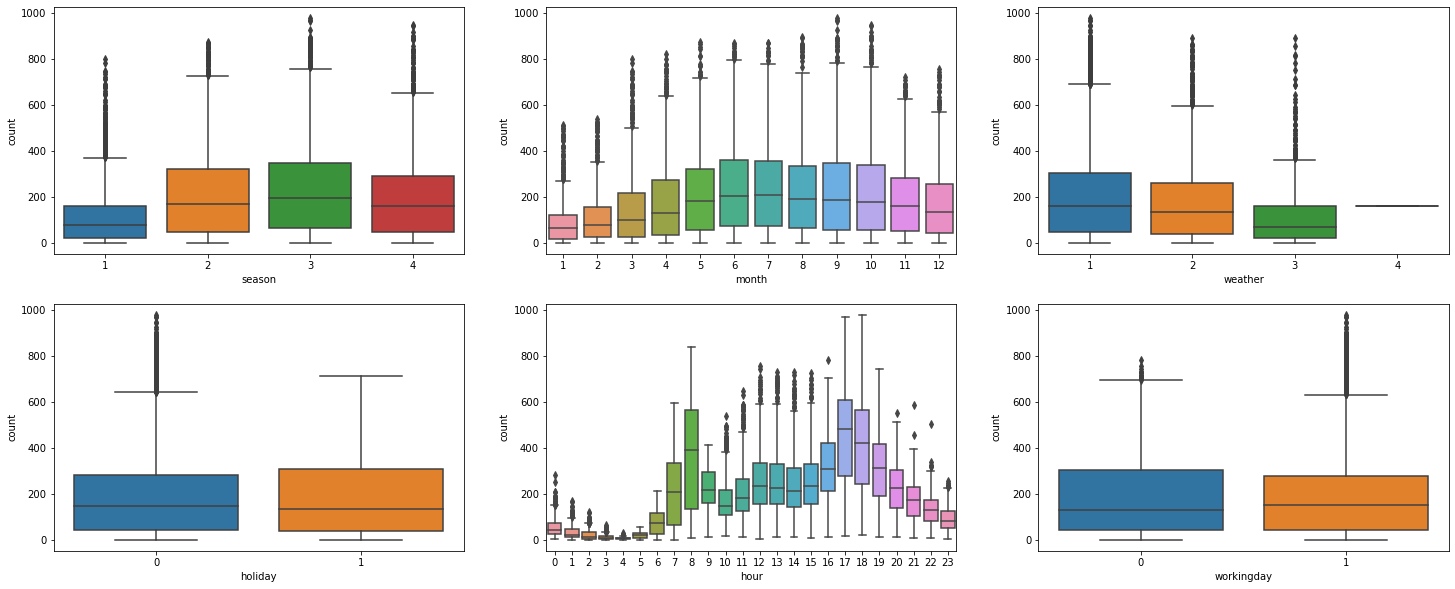

In [10]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'count', data = bike_sharing_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'month', y = 'count', data = bike_sharing_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weather', y = 'count', data = bike_sharing_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'count', data = bike_sharing_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'hour', y = 'count', data = bike_sharing_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'count', data = bike_sharing_df)
plt.show()

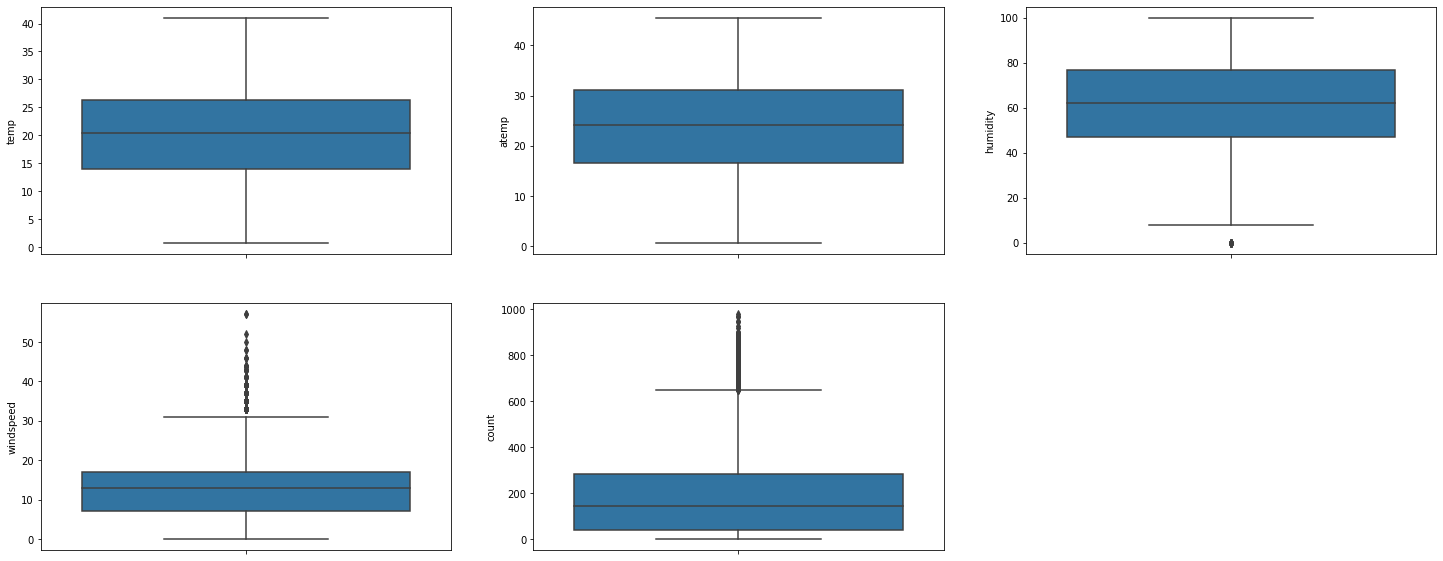

In [11]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot( y = 'temp', data = bike_sharing_df)
plt.subplot(2,3,2)
sns.boxplot(y = 'atemp', data = bike_sharing_df)
plt.subplot(2,3,3)
sns.boxplot(y = 'humidity', data = bike_sharing_df)
plt.subplot(2,3,4)
sns.boxplot(y = 'windspeed', data = bike_sharing_df)
plt.subplot(2,3,5)
sns.boxplot(y = 'count', data = bike_sharing_df)
plt.show()

In [12]:
def detectOutlier(column):
    q1 = bike_sharing_df[column].quantile(0.25)
    q3 = bike_sharing_df[column].quantile(0.75)

    q1,q3

    IQR = q3-q1
    IQR

    display(bike_sharing_df.loc[bike_sharing_df[column] < (q1-1.5*IQR)])

    display(bike_sharing_df.loc[bike_sharing_df[column] > (q3+1.5*IQR)])

In [13]:
detectOutlier('windspeed')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weather_types,Season_Names,day,month,year,hour,hour_category


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weather_types,Season_Names,day,month,year,hour,hour_category
175,2011-01-08 14:00:00,1,0,0,1,8.20,8.335,32,32.9975,12,83,95,cloudy,autumn,8,1,2011,14,Afternoon
178,2011-01-08 17:00:00,1,0,0,1,6.56,6.060,37,36.9974,5,64,69,cloudy,autumn,8,1,2011,17,Evening
194,2011-01-09 09:00:00,1,0,0,1,4.92,3.790,46,35.0008,0,19,19,cloudy,autumn,9,1,2011,9,Morning
196,2011-01-09 11:00:00,1,0,0,1,6.56,6.060,40,35.0008,2,47,49,cloudy,autumn,9,1,2011,11,Morning
265,2011-01-12 12:00:00,1,0,1,1,8.20,7.575,47,39.0007,3,52,55,cloudy,autumn,12,1,2011,12,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10013,2012-11-02 14:00:00,4,0,1,2,16.40,20.455,40,32.9975,63,199,262,rainy,winter,2,11,2012,14,Afternoon
10154,2012-11-08 12:00:00,4,0,1,1,16.40,20.455,24,32.9975,33,202,235,cloudy,winter,8,11,2012,12,Afternoon
10263,2012-11-13 01:00:00,4,0,1,3,18.04,21.970,88,43.0006,0,5,5,sunny,winter,13,11,2012,1,Midnight
10540,2012-12-05 14:00:00,4,0,1,1,19.68,23.485,33,32.9975,39,179,218,cloudy,winter,5,12,2012,14,Afternoon


In [25]:
bike_sharing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


#### Copying the bike sharing data to new df and keeping the original

In [14]:
bike_sharing_new = bike_sharing_df.copy()
bike_sharing_new.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weather_types,Season_Names,day,month,year,hour,hour_category
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,cloudy,autumn,1,1,2011,0,Midnight
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,cloudy,autumn,1,1,2011,1,Midnight


In [15]:
drop_cols = ['casual','registered','season','weather','day','datetime','hour']
bike_sharing_new = bike_sharing_new.drop(drop_cols, axis =1)
bike_sharing_new.head(2)

,holiday,workingday,temp,atemp,humidity,windspeed,count,weather_types,Season_Names,month,year,hour_category
0,0,0,9.84,14.395,81,0.0,16,cloudy,autumn,1,2011,Midnight
1,0,0,9.02,13.635,80,0.0,40,cloudy,autumn,1,2011,Midnight


#### Getting dummies for categorical variables

In [16]:
bike_sharing_new = pd.get_dummies(data= bike_sharing_new, columns=["month",'Season_Names','weather_types','hour_category'], drop_first=True)
bike_sharing_new.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,year,month_2,month_3,...,Season_Names_spring,Season_Names_summer,Season_Names_winter,weather_types_rainy,weather_types_sunny,weather_types_windy,hour_category_Morning,hour_category_Afternoon,hour_category_Evening,hour_category_Night
0,0,0,9.84,14.395,81,0.0,16,2011,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,9.02,13.635,80,0.0,40,2011,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,9.02,13.635,80,0.0,32,2011,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,9.84,14.395,75,0.0,13,2011,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,9.84,14.395,75,0.0,1,2011,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Binning

In [17]:
bike_sharing_binning = bike_sharing_df.copy()
bike_sharing_binning.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weather_types,Season_Names,day,month,year,hour,hour_category
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,cloudy,autumn,1,1,2011,0,Midnight
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,cloudy,autumn,1,1,2011,1,Midnight


In [18]:
drop_cols = ['datetime','month','hour','casual','registered','season','weather','day']
bike_sharing_binning = bike_sharing_binning.drop(drop_cols, axis =1)
bike_sharing_binning.head(2)

,holiday,workingday,temp,atemp,humidity,windspeed,count,weather_types,Season_Names,year,hour_category
0,0,0,9.84,14.395,81,0.0,16,cloudy,autumn,2011,Midnight
1,0,0,9.02,13.635,80,0.0,40,cloudy,autumn,2011,Midnight


In [19]:
bike_sharing_binning = pd.get_dummies(data= bike_sharing_binning, columns=['Season_Names','weather_types','hour_category'], drop_first=True)
bike_sharing_binning.head(2)

,holiday,workingday,temp,atemp,humidity,windspeed,count,year,Season_Names_spring,Season_Names_summer,Season_Names_winter,weather_types_rainy,weather_types_sunny,weather_types_windy,hour_category_Morning,hour_category_Afternoon,hour_category_Evening,hour_category_Night
0,0,0,9.84,14.395,81,0.0,16,2011,0,0,0,0,0,0,0,0,0,0
1,0,0,9.02,13.635,80,0.0,40,2011,0,0,0,0,0,0,0,0,0,0


In [20]:
bike_sharing_binning['Trans_count'] = np.log(bike_sharing_binning['count'])
bike_sharing_binning.head(2)

,holiday,workingday,temp,atemp,humidity,windspeed,count,year,Season_Names_spring,Season_Names_summer,Season_Names_winter,weather_types_rainy,weather_types_sunny,weather_types_windy,hour_category_Morning,hour_category_Afternoon,hour_category_Evening,hour_category_Night,Trans_count
0,0,0,9.84,14.395,81,0.0,16,2011,0,0,0,0,0,0,0,0,0,0,2.772589
1,0,0,9.02,13.635,80,0.0,40,2011,0,0,0,0,0,0,0,0,0,0,3.688879


In [21]:
bike_sharing_binning.head(2)

,holiday,workingday,temp,atemp,humidity,windspeed,count,year,Season_Names_spring,Season_Names_summer,Season_Names_winter,weather_types_rainy,weather_types_sunny,weather_types_windy,hour_category_Morning,hour_category_Afternoon,hour_category_Evening,hour_category_Night,Trans_count
0,0,0,9.84,14.395,81,0.0,16,2011,0,0,0,0,0,0,0,0,0,0,2.772589
1,0,0,9.02,13.635,80,0.0,40,2011,0,0,0,0,0,0,0,0,0,0,3.688879


In [22]:
np.exp(3.688879)

39.999981835446675

<AxesSubplot:>

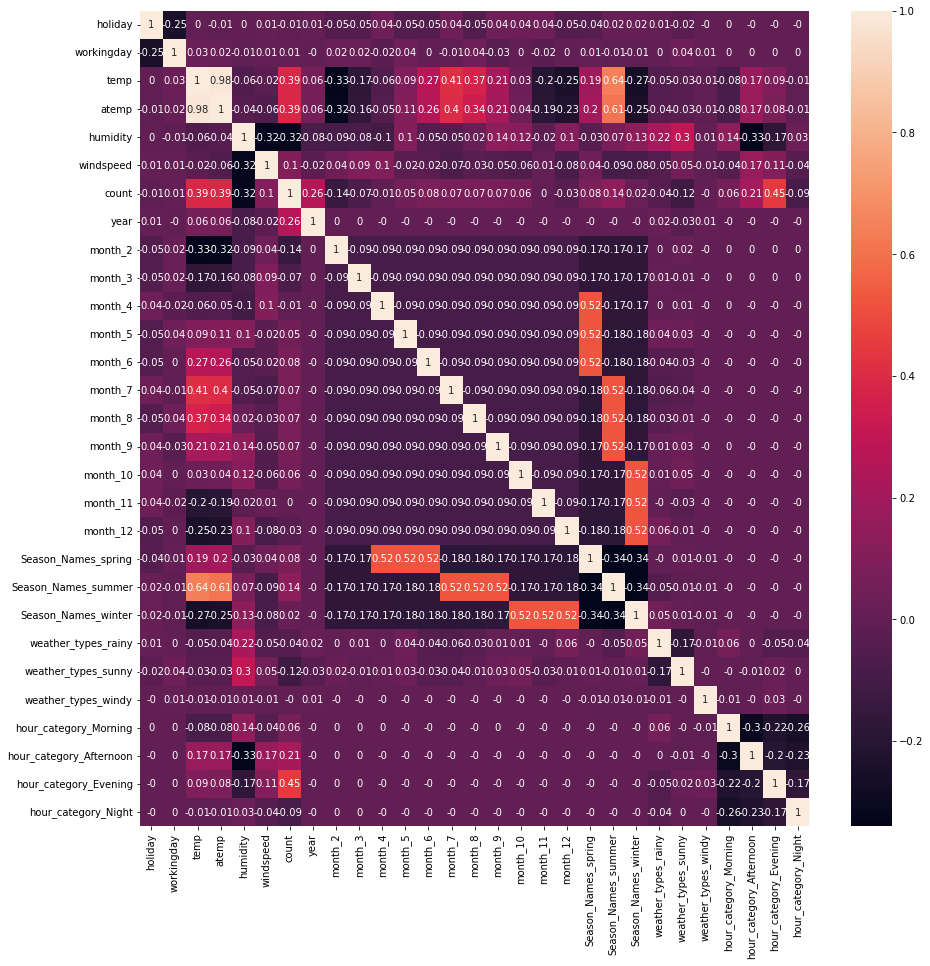

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(round(bike_sharing_new.corr(),2), annot=True)

In [24]:
#considering only significant columns
#Model 1
cols = ['count','Trans_count']
X = bike_sharing_new.drop(cols, axis = 1)
Y = bike_sharing_binning["Trans_count"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)


lr = LinearRegression()

lr.fit(X_train,Y_train)

Y_predict = lr.predict(X_test)

mse = mean_squared_error(Y_predict,Y_test)
print(mse)
print(lr.score(X_train,Y_train))
print(lr.score(X_test,Y_test))

KeyError: "['Trans_count'] not found in axis"

In [ ]:
calculateVIF(X)

In [ ]:
m = smf.ols(formula='count ~ X', data= bike_sharing_binning).fit()
m.summary()

In [ ]:
cols = ['count','Trans_count', 'holiday','workingday','windspeed','weather_types_windy'
       ,'Qtr_2', 'Qtr_3', 'Qtr_4','Season_Names_spring',
       'Season_Names_summer', 'Season_Names_winter','atemp','year','humidity']
X = bike_sharing_binning.drop(cols, axis = 1)
Y = bike_sharing_binning["Trans_count"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)


lr = LinearRegression()

lr.fit(X_train,Y_train)

Y_predict = lr.predict(X_test)

mse = mean_squared_error(Y_predict,Y_test)
print(mse)
print(lr.score(X_train,Y_train))
print(lr.score(X_test,Y_test))

In [ ]:
calculateVIF(X)

In [ ]:
bike_sharing_df.head(5)

In [ ]:
np.log(16)

In [ ]:
bike_sharing_binning.head(10)

In [ ]:
X.head(10).values

In [ ]:
new = [[9.84,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.   ]]
lr.predict(new)

#### Train Test split

In [ ]:
df_train, df_test = train_test_split(bike_sharing_new, train_size = 0.80, test_size = 0.20, random_state = 42)
print(df_train.shape ,  df_test.shape)

#### Applying transformation on target variable as linear regression assumes the data to be noramlly distributed
#### But we observe that data of target variable is skewed

In [ ]:
sns.displot(df_train['count'],kind='kde')

In [ ]:
df_train['Trans_count'] = np.log(df_train['count'])
df_train.head(2)

In [ ]:
df_test['Trans_count'] = np.log(df_test['count'])
df_test.head(2)

In [ ]:
np.exp(6.109248)

In [ ]:
sns.displot(df_train['Trans_count'],kind='kde')

In [ ]:
def buildModel(cols, x_train, y_train):
    regressor = LinearRegression()
    regressor.fit(x_train,y_train)

    #x_test = df_test.drop(cols, axis =1)
    #y_test = df_test['Trans_count']

    y_pred = regressor.predict(x_train)
    y_pred
    
    mse = mean_squared_error(y_train,y_pred)
    print(mse)
    print(regressor.score(x_train,y_train))
    #print(regressor.score(x_test,y_test))

#### Model 1

In [ ]:
cols = ['count','Trans_count']
x_train1 = df_train.drop(cols,axis = 1)
y_train = df_train['Trans_count']
print(x_train1.shape, y_train.shape)
buildModel(cols, x_train1, y_train)

In [ ]:
model = smf.ols(formula='Trans_count ~ x_train1', data= df_train).fit()
model.summary()

In [ ]:
calculateVIF(x_train1)

In [ ]:
cols = ['month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
        'Season_Names_spring', 'Season_Names_summer', 'Season_Names_winter']
x_train2 = x_train1.drop(cols,axis = 1)
print(x_train2.shape, y_train.shape)
buildModel(cols, x_train1, y_train)

In [ ]:
calculateVIF(x_train2)

In [ ]:
cols = ['atemp']
x_train3 = x_train2.drop(cols,axis = 1)
print(x_train3.shape, y_train.shape)
buildModel(cols, x_train3, y_train)

In [ ]:
calculateVIF(x_train3)

In [ ]:
cols = ['year']
x_train4 = x_train3.drop(cols,axis = 1)
#print(x_train1.shape, y_train1.shape)
buildModel(cols, x_train4, y_train)

In [ ]:
calculateVIF(x_train4)

In [ ]:
model = smf.ols(formula='Trans_count ~ x_train4', data= df_train).fit()
model.summary()

In [ ]:
x_train4.columns

In [ ]:
cols = ['holiday','weather_types_rainy','weather_types_windy']
x_train5 = x_train4.drop(cols,axis = 1)
buildModel(cols, x_train5, y_train)

In [ ]:
calculateVIF(x_train5)

In [ ]:
model2 = smf.ols(formula='Trans_count ~ x_train5', data= df_train).fit()
model2.summary()

In [ ]:
cols = ['humidity','windspeed']
x_train6 = x_train5.drop(cols,axis = 1)
buildModel(cols, x_train6, y_train)

In [ ]:
calculateVIF(x_train6)

In [ ]:
model3 = smf.ols(formula='Trans_count ~ x_train6', data= df_train).fit()
model3.summary()

In [ ]:
x_test = df_test[x_train6.columns]
y_test = df_test['Trans_count']

lr = LinearRegression()
lr.fit(x_train6,y_train)

y_pred = lr.predict(x_test)
print(mean_squared_error(y_test, y_pred))

print('Train Accuracy:', lr.score(x_train6,y_train))
print('Test Accuracy:', lr.score(x_test,y_test))

In [ ]:
x_test.columns

In [ ]:
final_model = smf.ols(formula='Trans_count ~ x_test',
                     data = df_test).fit()
final_model.summary()

In [ ]:
lasso = Lasso()
lasso.fit(x_train6,y_train)

y_pred = lasso.predict(x_test)
print(mean_squared_error(y_test, y_pred))

print('Train Accuracy:', lasso.score(x_train6,y_train))
print('Test Accuracy:', lasso.score(x_test,y_test))

In [ ]:
rid = Ridge()
rid.fit(x_train6,y_train)

y_pred = rid.predict(x_test)
print(mean_squared_error(y_test, y_pred))

print('Train Accuracy:', rid.score(x_train6,y_train))
print('Test Accuracy:', rid.score(x_test,y_test))